### Description
One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales - sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

### Analysis Tasks
Which store has maximum sales?

Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of variation.

Which store has good quarterly growth rate in Q3’2012?

Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together?

Provide a monthly and semester view of sales in units and give insights?

### Model
    
Build prediction models to forecast demand


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [30]:
data=pd.read_excel("Walmart_Store_sales.xlsx")

In [31]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02 00:00:00,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02 00:00:00,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03 00:00:00,1554806.68,0,46.50,2.625,211.350143,8.106


In [32]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [33]:
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [34]:
data.shape

(6435, 8)

### Analysis 1: Which store has maximum sales

In [35]:
store_sales = data.groupby('Store').agg({'Weekly_Sales': sum})
store_sales

,Weekly_Sales
Store,
1,2.224028e+08
2,2.753824e+08
3,5.758674e+07
4,2.995440e+08
5,4.547569e+07
6,2.237561e+08
7,8.159828e+07
8,1.299512e+08
9,7.778922e+07


In [36]:
max_store_sales =store_sales[store_sales.Weekly_Sales == store_sales.Weekly_Sales.max()]
max_store_sales

,Weekly_Sales
Store,
20,3.013978e+08


<Axes: xlabel='Store'>

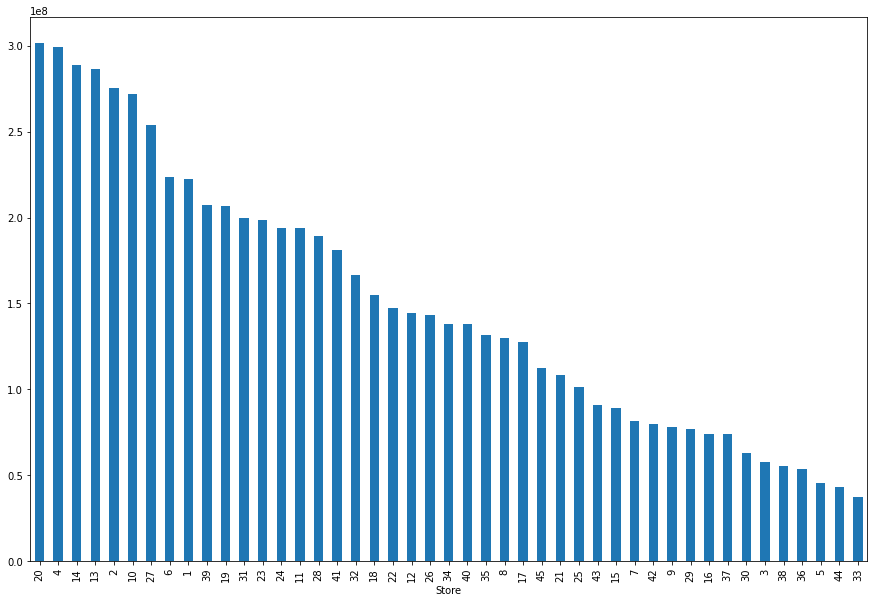

In [37]:
plt.figure(figsize=(15,10))
data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).plot(kind='bar')

### Store 20 has maximum sale of 3.013978e+08

### Analysis 2: Which store has maximum standard deviation ?

In [38]:
Std_Sales = data.groupby(['Store'])['Weekly_Sales'].std()
Std_Sales

Store
1     155980.767761
2     237683.694682
3      46319.631557
4     266201.442297
5      37737.965745
6     212525.855862
7     112585.469220
8     106280.829881
9      69028.666585
10    302262.062504
11    165833.887863
12    139166.871880
13    265506.995776
14    317569.949476
15    120538.652043
16     85769.680133
17    112162.936087
18    176641.510839
19    191722.638730
20    275900.562742
21    128752.812853
22    161251.350631
23    249788.038068
24    167745.677567
25    112976.788600
26    110431.288141
27    239930.135688
28    181758.967539
29     99120.136596
30     22809.665590
31    125855.942933
32    138017.252087
33     24132.927322
34    104630.164676
35    211243.457791
36     60725.173579
37     21837.461190
38     42768.169450
39    217466.454833
40    119002.112858
41    187907.162766
42     50262.925530
43     40598.413260
44     24762.832015
45    130168.526635
Name: Weekly_Sales, dtype: float64

In [39]:
max_std = max(Std_Sales)
max_std

317569.9494755081

In [40]:
for i in range(1,46):
    if max_std == Std_Sales[i]:
        print('Store which has maximum standard deviation is {}'.format(i))

Store which has maximum standard deviation is 14


In [42]:
mean_sales=data.groupby(['Store'])['Weekly_Sales'].mean()

#Coefficient of variation=standard deviation/mean
cv=Std_Sales/mean_sales
cv

Store
1     0.100292
2     0.123424
3     0.115021
4     0.127083
5     0.118668
6     0.135823
7     0.197305
8     0.116953
9     0.126895
10    0.159133
11    0.122262
12    0.137925
13    0.132514
14    0.157137
15    0.193384
16    0.165181
17    0.125521
18    0.162845
19    0.132680
20    0.130903
21    0.170292
22    0.156783
23    0.179721
24    0.123637
25    0.159860
26    0.110111
27    0.135155
28    0.137330
29    0.183742
30    0.052008
31    0.090161
32    0.118310
33    0.092868
34    0.108225
35    0.229681
36    0.162579
37    0.042084
38    0.110875
39    0.149908
40    0.123430
41    0.148177
42    0.090335
43    0.064104
44    0.081793
45    0.165613
Name: Weekly_Sales, dtype: float64

In [43]:
max_cv=cv.max()
max_cv

0.2296811138997643

In [44]:
for i in range(1,46):
  if max_cv==cv[i]:
    print('Store which has maximum coefficient of variation is {}'.format(i))

Store which has maximum coefficient of variation is 35


### Store 14 has maximum standard deviation and store 35 has maximum coefficient of variation.

### Analysis 3 : Which store/s has good quarterly growth rate in Q3’2012?

In [73]:
# The date column is object type. So need to convert to datetime.
from datetime import datetime
data['Date']=pd.to_datetime(data['Date'])
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Day           6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  Year          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 553.1 KB
None


In [46]:
#Q2 Sales
q2_sales=data[(data['Date']>= '2012-4-01') & (data['Date']<='2012-6-30')].groupby('Store')['Weekly_Sales'].sum()
#Q3 Sales
q3_sales=data[(data['Date']>= '2012-7-01') & (data['Date']<='2012-9-30')].groupby('Store')['Weekly_Sales'].sum()

In [47]:
#First we need to find the difference b/w Q2 sales and Q3 sales and find the Growth rate.

pd.DataFrame({'Q2_sales':q2_sales,
             'Q3_sales':q3_sales,
             'Difference':q3_sales-q2_sales,
             'Growth Rate':(q3_sales-q2_sales)/q2_sales*100}).sort_values(by=['Growth Rate'],ascending=False)

,Q2_sales,Q3_sales,Difference,Growth Rate
Store,,,,
16,6626133.44,6441311.11,-184822.33,-2.789294
7,7613593.92,7322393.92,-291200.00,-3.824738
35,10753570.97,10252122.68,-501448.29,-4.663086
26,13218289.66,12417575.35,-800714.31,-6.057624
39,20191585.63,18899955.17,-1291630.46,-6.396875
23,18283424.90,17103654.36,-1179770.54,-6.452678
41,17560035.88,16373588.44,-1186447.44,-6.756521
44,4322555.33,4020486.01,-302069.32,-6.988212
32,15415236.21,14142164.84,-1273071.37,-8.258527


### No store has shown quarterly growth in Q3 2012.

### Question 4: Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together.

In [48]:
# Mean sales for holiday season for all stores
# Holiday Events

Super_Bowl=['12-2-10', '11-2-11', '10-2-12']
Labour_Day=['10-9-10', '9-9-11', '7-9-12']
Thanksgiving=['26-11-10', '25-11-11', '23-11-12']
Christmas=['31-12-10', '30-12-11', '28-12-12']

In [49]:
Super_Bowl_sales=data.loc[data.Date.isin(Super_Bowl)]['Weekly_Sales'].mean().round(2)
Labour_Day_sales=data.loc[data.Date.isin(Labour_Day)]['Weekly_Sales'].mean().round(2)
Thanksgiving_sales=data.loc[data.Date.isin(Thanksgiving)]['Weekly_Sales'].mean().round(2)
Christmas_sales=data.loc[data.Date.isin(Christmas)]['Weekly_Sales'].mean().round(2)

print(Super_Bowl_sales,Labour_Day_sales,Thanksgiving_sales,Christmas_sales)

1079127.99 1042427.29 1471273.43 960833.11


In [50]:
# Mean sales for non-holiday season for all stores
mean_non_holiday_sales = data[data.Holiday_Flag == 0].agg({'Weekly_Sales': 'mean'})
mean_non_holiday_sales

Weekly_Sales    1.041256e+06
dtype: float64

In [51]:
pd.DataFrame({'Super_Bowl_sales':Super_Bowl_sales,
             'Labour_Day_sales':Labour_Day_sales,
             'Thanksgiving_sales':Thanksgiving_sales,
             'Christmas_sales':Christmas_sales,
             'mean_non_holiday_sales':mean_non_holiday_sales}).T

,Weekly_Sales
Super_Bowl_sales,1.079128e+06
Labour_Day_sales,1.042427e+06
Thanksgiving_sales,1.471273e+06
Christmas_sales,9.608331e+05
mean_non_holiday_sales,1.041256e+06


### Thanksgiving has the highest sales than the non-holiday sales.

### Analysis 5: Provide a monthly and semester view of sales in units and give insights

In [52]:
data['Day'] = pd.DatetimeIndex(data['Date']).day
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Year'] = pd.DatetimeIndex(data['Date']).year

2010


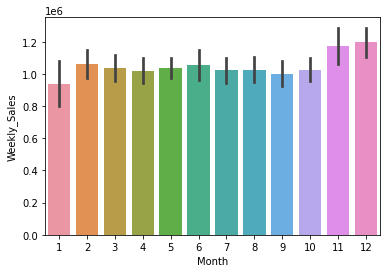

2011


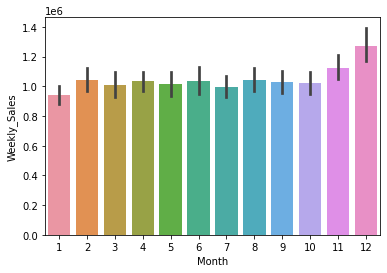

2012


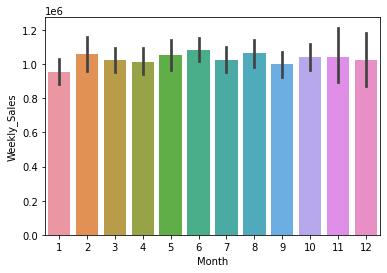

In [53]:
#Monthly view in each year
for i in data['Year'].unique():
    print(i)
    sb.barplot(data=data, x=data[data.Year==i]['Month'], y=data[data.Year==i]['Weekly_Sales'])
    plt.show()

<Axes: xlabel='Year'>

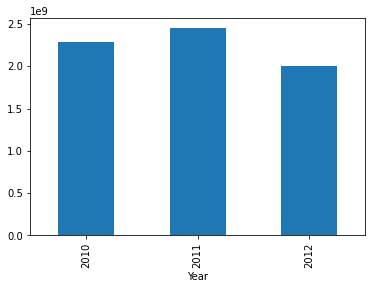

In [54]:
data.groupby('Year')['Weekly_Sales'].sum().plot(kind='bar',legend=False)

In [55]:
### Highest sales in 2011 and lowest sales in 2012

In [56]:
#Semester view of Sales
Year_2010=data.loc[data["Year"]==2010]
Year_2011=data.loc[data["Year"]==2011]
Year_2012=data.loc[data["Year"]==2012]

semester_sales = []
semester_sales.append(Year_2010.loc[Year_2010['Month']<7, ['Weekly_Sales']].sum())
semester_sales.append(Year_2010.loc[Year_2010['Month']>6, ['Weekly_Sales']].sum())
semester_sales.append(Year_2011.loc[Year_2011['Month']<7, ['Weekly_Sales']].sum())
semester_sales.append(Year_2011.loc[Year_2011['Month']>6, ['Weekly_Sales']].sum())
semester_sales.append(Year_2012.loc[Year_2012['Month']<7, ['Weekly_Sales']].sum())
semester_sales.append(Year_2012.loc[Year_2012['Month']>6, ['Weekly_Sales']].sum())

In [57]:
semester_names=["sem1_2010","sem2_2010","sem1_2011","sem2_2011","sem1_2012","sem2_2012"]

Text(0.5, 1.0, 'Semester view of sales')

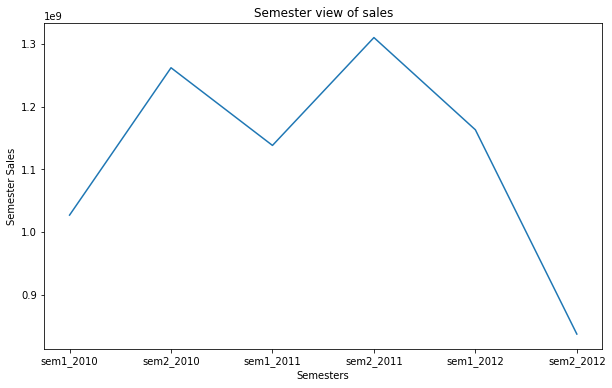

In [58]:
plt.figure(figsize=(10,6))
plt.plot(semester_names,semester_sales)
plt.xlabel("Semesters")
plt.ylabel("Semester Sales")
plt.title("Semester view of sales")

### Prediction Models

In [59]:
# Separate Dependent and Independent variable
X = data[['Store', 'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year']]
y = data['Weekly_Sales']

In [60]:
#Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [61]:
# Scaling 

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 1. Linear Regression

In [63]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
lr_model_pred=lr_model.predict(X_test)

In [92]:
print('Train Accuracy Score:', lr_model.score(X_train, y_train).round(3)*100, '%')
print('Test Accuracy Score:', r2_score(y_test, lr_model_pred).round(5)*100, '%')

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_model_pred).round(3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_model_pred).round(3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_model_pred)).round(3))

Train Accuracy Score: 14.099999999999998 %
Test Accuracy Score: 15.392 %
Mean Absolute Error: 425148.518
Mean Squared Error: 264035453840.075
Root Mean Squared Error: 513843.803


### 2. K Nearest Neighbors

In [65]:
from sklearn.neighbors import KNeighborsRegressor

In [66]:
knn=KNeighborsRegressor()

In [67]:
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
knn_r2 = r2_score(y_test, y_pred_knn)
mae = metrics.mean_absolute_error(y_test, y_pred_knn)
mse = metrics.mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn))

In [82]:
print('Accuracy :', knn_r2.round(2)*100,'%')
print('Mean Absolute Error:', mae.round(5))
print('Mean Squared Error:', mse.round(5))
print('Root Mean Squared Error:', rmse.round(5))

Accuracy : 39.0 %
Mean Absolute Error: 69066.87943
Mean Squared Error: 16695482443.77682
Root Mean Squared Error: 129210.9997


### 3. Decision Tree Regressor

In [69]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dt = dtr.predict(X_test)

r2_dtr = r2_score(y_test,y_pred_dt)
mae = metrics.mean_absolute_error(y_test, y_pred_dt)
mse = metrics.mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt))

In [81]:
print('Accuracy=', r2_dtr.round(2)*100,'%')
print('Mean Absolute Error =', mae.round(5))
print('Mean Squared Error=', mse.round(5))
print('Root Mean Squared Errorr=', rmse.round(5))

Accuracy= 92.0 %
Mean Absolute Error = 69066.87943
Mean Squared Error= 16695482443.77682
Root Mean Squared Errorr= 129210.9997


### 4. Random Forest Regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)
y_pred_rf=rf_model.predict(X_test)

r2_rf = r2_score(y_test,y_pred_rf)
mae = metrics.mean_absolute_error(y_test, y_pred_rf)
mse = metrics.mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))

print('Accuracy:', r2_rf.round(5)*100,'%')
print('Mean Absolute Error :', mae.round(5))
print('Mean Squared Error:', mse.round(5))
print('Root Mean Squared Error:', rmse.round(5))

Accuracy: 94.65 %
Mean Absolute Error : 69066.87943
Mean Squared Error: 16695482443.77682
Root Mean Squared Error: 129210.9997


In [72]:
# Random Forest Regressor  has better accuracy score than other models.